In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

import os
import os.path as path
import wget

In [2]:
X = np.array([-1.,0.,1.])
Y = np.array([2,0,2])

In [6]:
f1 = (Y[1]-Y[0])/(X[1]-X[0])
f2 = (Y[2]-Y[1])/(X[2]-X[1])
print(f1,f2)

-2.0 2.0


In [7]:
d2f = (f2-f1)/(X[2]-X[0])
print(d2f)

2.0


In [8]:
x = np.linspace(-1,1,50)
y = Y[0] + f1*(x-X[0]) + d2f*(x-X[0])*(x-X[1])

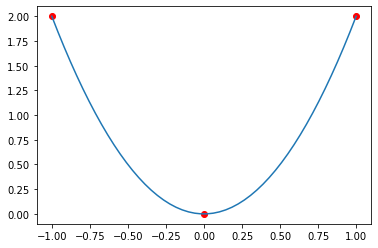

In [10]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [2]:
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'